In [19]:
import pandas as pd
import numpy as np 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [24]:
data1= pd.read_csv('diabetes.csv',header=0, names= col_names)

In [25]:
data1

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
data1.shape

(768, 9)

In [32]:
(np.sum(data1['label']))

268

In [34]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data1[feature_cols] 
y = data1.label

In [39]:
import sklearn

In [42]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression 

In [48]:
LR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred=LR.predict(X_test)
y_actual =np.array(y_test)

In [75]:
data3 = pd.DataFrame(y_pred,columns=[['predicted_value']])

In [78]:
data3['actual_value'] = y_actual

In [79]:
data3

,predicted_value,actual_value
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
187,0,1
188,0,1
189,0,0
190,0,0


In [65]:
data3 = pd.DataFrame(y_test,columns=['actual_value'])

In [81]:
from sklearn.metrics import confusion_matrix
con =  confusion_matrix
cnf = con(y_test, y_pred)

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

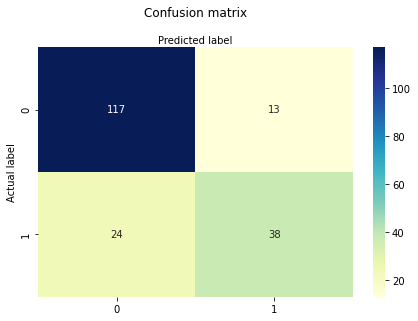

In [87]:
## visualizing confusion matrix 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [89]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


In [91]:
y_pred_proba = LR.predict_proba(X_test)[:,1]

In [92]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [93]:
fpr

array([0.        , 0.        , 0.        , 0.00769231, 0.00769231,
       0.01538462, 0.01538462, 0.02307692, 0.02307692, 0.03076923,
       0.03076923, 0.03846154, 0.03846154, 0.04615385, 0.04615385,
       0.05384615, 0.05384615, 0.06153846, 0.06153846, 0.06923077,
       0.06923077, 0.12307692, 0.12307692, 0.13076923, 0.13076923,
       0.16153846, 0.16153846, 0.17692308, 0.17692308, 0.18461538,
       0.18461538, 0.2       , 0.2       , 0.20769231, 0.20769231,
       0.21538462, 0.21538462, 0.23076923, 0.23076923, 0.27692308,
       0.27692308, 0.29230769, 0.29230769, 0.31538462, 0.31538462,
       0.33076923, 0.33076923, 0.37692308, 0.37692308, 0.43076923,
       0.43076923, 0.45384615, 0.45384615, 0.53846154, 0.53846154,
       0.86923077, 0.86923077, 1.        ])

In [94]:
tpr

array([0.        , 0.01612903, 0.03225806, 0.03225806, 0.06451613,
       0.06451613, 0.16129032, 0.16129032, 0.20967742, 0.20967742,
       0.33870968, 0.33870968, 0.41935484, 0.41935484, 0.4516129 ,
       0.4516129 , 0.48387097, 0.48387097, 0.51612903, 0.51612903,
       0.61290323, 0.61290323, 0.62903226, 0.62903226, 0.64516129,
       0.64516129, 0.66129032, 0.66129032, 0.70967742, 0.70967742,
       0.72580645, 0.72580645, 0.74193548, 0.74193548, 0.75806452,
       0.75806452, 0.77419355, 0.77419355, 0.80645161, 0.80645161,
       0.82258065, 0.82258065, 0.83870968, 0.83870968, 0.88709677,
       0.88709677, 0.90322581, 0.90322581, 0.91935484, 0.91935484,
       0.93548387, 0.93548387, 0.96774194, 0.96774194, 0.98387097,
       0.98387097, 1.        , 1.        ])

In [95]:
_

array([1.97086865, 0.97086865, 0.96321784, 0.95477163, 0.94963956,
       0.91158157, 0.83820374, 0.83653377, 0.77351396, 0.77172405,
       0.71137215, 0.69184577, 0.67542213, 0.66327472, 0.63822372,
       0.63002981, 0.62628758, 0.6254598 , 0.60173986, 0.59423248,
       0.51847614, 0.46192014, 0.46067022, 0.4595176 , 0.44323874,
       0.43205736, 0.41852437, 0.405156  , 0.39515728, 0.3941085 ,
       0.38474962, 0.38058215, 0.37426491, 0.37189378, 0.3632877 ,
       0.3604662 , 0.35285219, 0.35213813, 0.34050367, 0.30844846,
       0.30675902, 0.29840803, 0.29805585, 0.28027982, 0.26567838,
       0.2607479 , 0.2516629 , 0.2413383 , 0.23925536, 0.2069162 ,
       0.20095547, 0.18476014, 0.1825036 , 0.15767071, 0.15314563,
       0.0655922 , 0.06422654, 0.00331849])

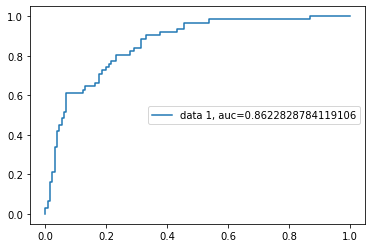

In [97]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=5)
plt.show()

# multiclassifcation in logisticrgression

In [98]:
from sklearn import datasets

In [100]:
iris  = datasets.load_iris()

In [103]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [107]:
data1=pd.DataFrame(iris.data,columns =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

In [108]:
data1['versicolor'] = iris.target

In [109]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),versicolor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [132]:
from sklearn.preprocessing  import StandardScaler 
sc = StandardScaler()

In [133]:
x = data1.iloc[:,0:4]
y =data1.iloc[:,4:5] 

In [134]:
x_std =sc.fit_transform(x,y=None)

In [135]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_std,y,test_size=0.25,random_state=0)

In [137]:
LR= LogisticRegression(random_state=0, multi_class='ovr')
LR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(multi_class='ovr', random_state=0)

In [140]:
pred =LR.predict(X_test)

In [141]:
pred

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [143]:
y_actual =np.array(y_test)
data3 = pd.DataFrame(pred,columns=[['predicted_value']])
data3['actual_value'] = y_actual

In [145]:
data3

,predicted_value,actual_value
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,2,1
8,1,1
9,1,1


In [146]:
from sklearn.metrics import confusion_matrix
con =  confusion_matrix
cnf = con(y_test, pred)

In [147]:
cnf

array([[13,  0,  0],
       [ 0, 13,  3],
       [ 0,  1,  8]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

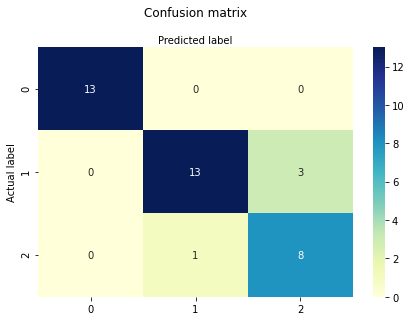

In [148]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [153]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))


Accuracy: 0.8947368421052632
